# HW 06 
# Gary Fowler


## Exercise 7.1 

### Fourier transforms of simple functions


Write python programs to calculate the coeffecients in the discrete Fourier transforms of the following periodic functions sampled at N = 1000 evenly spaced points and make plots of their amplitudes.

a) A single cycle of a square-wave with amplitude 1.

b) The sawtooth wave $$Y_n = n$$

c) The modulated sine wave $$Y_n = sin(\pi n/N)sin(20 \pi n/N)$$

C:\Users\Gary\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


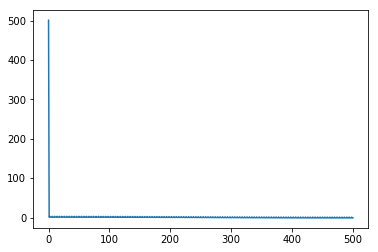

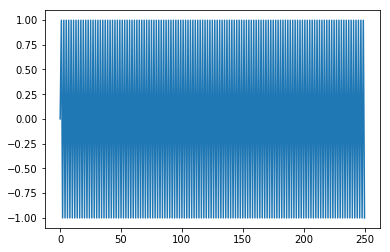

In [127]:
## @author: Gary Fowler

import numpy as np
import matplotlib.pyplot as plt

def dft(y):
    N = len(y)
    c = np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c


#part a
N = 1000
x = np.linspace(0,4,N)
y = np.array(x+1,dtype=int)%2
c = dft(y)
plt.plot(c)
plt.show()

#part b
def b(t):
    return 2*((t/1) - np.floor(.5 + (t/1)))

tpoints = np.linspace(0,1,N//2)
xpoints = []
for t in tpoints:
    xpoints.append(b(t))

d = dft(xpoints)
plt.plot(d)
plt.show()


## Exercise 7.2 

### Detecting periodicity


Using sunspots.txt:

a) Write a program that reads the data in the file and makes a graph of the sunspots as a function of time. Make an estimate of the length of the cycle in months.

b) Modify the program to calculate the Fourier transform of the sunspot data and then make the graph of the magnitude ck^2 of the Fourier coefficients as a function of k.

k = p / 2pi where k is the number of complete cycles
p = 2pik, k = 24
150.79644737231007 the total period in months.


C:\Users\Gary\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


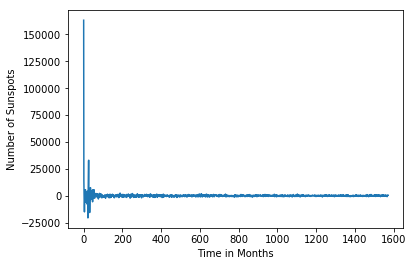

In [59]:
## @author: Gary Fowler

import numpy as np
import matplotlib.pyplot as plt

#part a
data = np.loadtxt("sunspots.txt",float)
fig = plt.figure()
ax = fig.add_subplot(111)

x = data[:,0]
y = data[:,1]
ax.set_xlabel('Time in Months')
ax.set_ylabel('Number of Sunspots')

#plt.plot(x,y)
#plt.show()

print("k = p / 2pi where k is the number of complete cycles")
print("p = 2pik, k = 24")
k = 24
print(2*np.pi*k, "the total period in months.")

#part b
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

g = dft(y)

plt.plot(g)
plt.show()

## Exercise 7.3 

### FT of musical instruments


Using piano.txt and trumpet.txt:

a) Write a program that loads a waveform from one of the files, plots it, then calculates its discrete FT and plots the magnitudes of the first 10,000 coefficients. Apply the program to both the piano and trumpet waveforms and discuss briefly what one can conclude about the sound of the two instruments from the plots of the Fourier coefficients.

b) Both waveforms were recorded at industry-standard rate of 44,100 samples per second and both instruments were playing the same note when the recordings were made. Calculate the note they were playing.

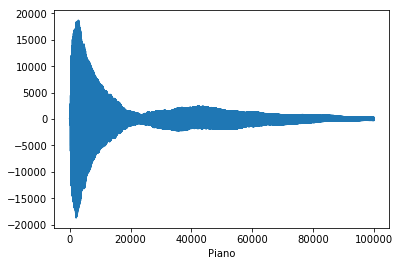

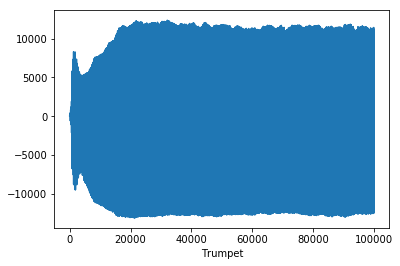

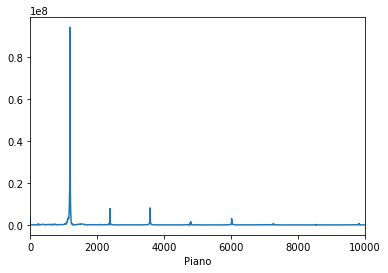

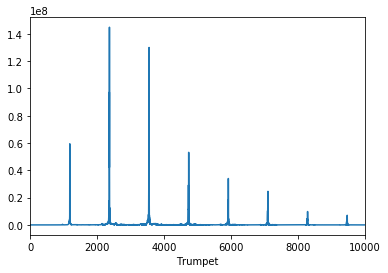

In [70]:
import numpy as np
import matplotlib.pyplot as plt

#part a
piano = np.loadtxt("piano.txt",int)
trumpet = np.loadtxt("trumpet.txt",int)

plt.plot(piano)
plt.xlabel("Piano")
plt.show()
plt.plot(trumpet)
plt.xlabel("Trumpet")
plt.show()

c = np.fft.rfft(piano)
plt.plot(abs(c))
plt.xlabel("Piano")
plt.xlim(0,10000)
plt.show()

c = np.fft.rfft(trumpet)
plt.plot(abs(c))
plt.xlabel("Trumpet")
plt.xlim(0,10000)
plt.show()

The Piano seems to have a softer tune, the trumpet is much harsher and has a lot of spikes in the Fourier transform graphs.

b)
Based on where the largest spike is on both instruments I would assume the note is somewhere between 1500 and 2250. I would then conclude it was C 3 octaves above middle C which has a frequency of 2093.

## Exercise 7.4 

### Fourier filtering and smoothing


Using dow.txt:

Write a program to:

a) Read the data from dow.txt and plot them

b) Calculate the coeffecients of the dft of the data using rfft

c) Set all but the first 10% of elements to 0

d) Calculate the irfft and plot it on the same graph. What is happening when you set the coeffecients to 0?

e) Modify your program to set all but the first 2% and run again.

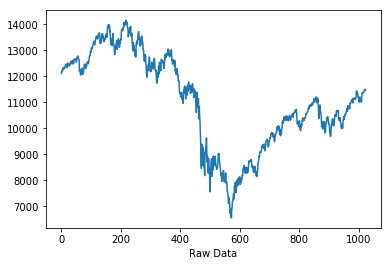

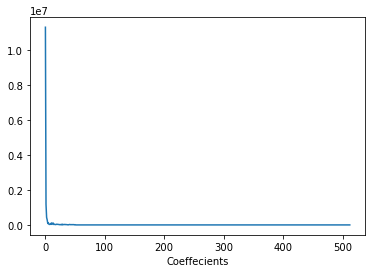

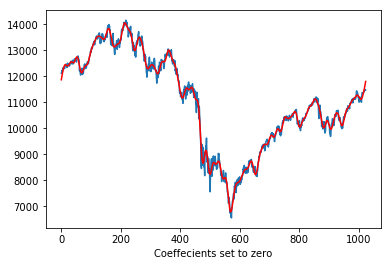

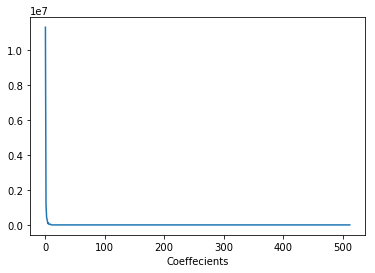

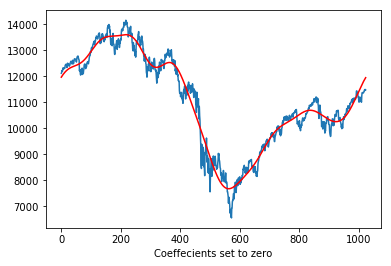

In [102]:
import numpy as np
import matplotlib.pyplot as plt

#part a
#dow.txt holds information of a stores closing value of the Dow Jones Intdustrial Average
data = np.loadtxt("dow.txt",int)

plt.plot(data)
plt.xlabel("Raw Data")
plt.show()

#array c of rfft coeffecients
c = np.fft.rfft(data)
#used in the slicing, holds an int length of the data
nc = len(c)

#slice all but the first 10 percent
c[nc//10:] = 0

#calc the inverse fft to go back to orig data
d = np.fft.irfft(c)

plt.plot(abs(c))
plt.xlabel("Coeffecients")
plt.show()

plt.plot(data)
plt.plot(d,'r')
plt.xlabel("Coeffecients set to zero")
plt.show()

#slice all but the first 2 percent
c[int(nc*.02):] = 0

#calculate the inverse fft to go back to original data
d = np.fft.irfft(c)

plt.plot(abs(c))
plt.xlabel("Coeffecients")
plt.show()

plt.plot(data)
plt.plot(d,'r')
plt.xlabel("Coeffecients set to zero")
plt.show()

When the coeffecients are turned to 0 it cleans up most of the noise, the lines become a little smoother.

## Exercise 7.5 

### Extending problem 7.4


Write a program that creates an array of N = 1000 elements containing a thousand equally spaced samples from a single cycle of the square-wave. Set all but the first 10% to 0 and graph these coeffecients with the original.

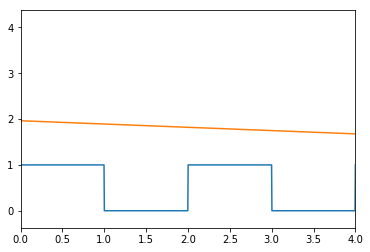

In [125]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(0,4,N)
y = np.array(x+1,dtype=int)%2

#calculate coeffecients, set all but the first 10 to 0, then find the inverse
c = np.fft.rfft(x)
c[10:] = 0
d = np.fft.irfft(c)

plt.plot(x,y)
plt.plot(d)
plt.xlim(0,4)
plt.show()
